# Analisis Técnico

## Oscilador Estocástico 

In [3]:
import pandas as pd
from pandas_datareader import data as pdr
import numpy as np
import datetime as date
import matplotlib.pyplot as plt

In [83]:
enddate = date.datetime(2020,4,23)
startdate = date.datetime(2019,4,1)
tick = '^MXX'
ipc = pdr.get_data_yahoo(tick, start = startdate, end = enddate)

In [84]:
ipc.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-04-01,43838.191406,43302.449219,43302.449219,43672.058594,130210300,43672.058594
2019-04-02,43672.058594,43168.058594,43672.058594,43324.589844,115672300,43324.589844
2019-04-03,43658.960938,43298.199219,43391.929688,43339.750000,139044600,43339.750000
2019-04-04,43990.179688,43252.281250,43341.191406,43937.390625,130329800,43937.390625
2019-04-05,45023.539062,44007.730469,44007.730469,44989.859375,217740400,44989.859375


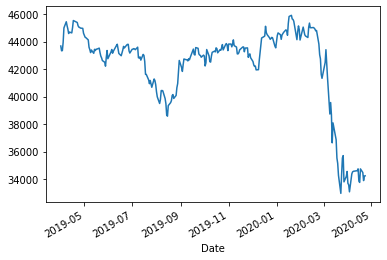

In [85]:
%matplotlib inline
ipc.Close.plot()

# Oscilador Estocastico

In [86]:
def STOK(df):
    SOk = pd.Series((df['Close']-df['Low'])/(df['High']-df['Low']), name = 'SOk')
    df = df.join(SOk)
    return df

In [87]:
df = STOK(ipc)

In [88]:
df = df[['Close', 'SOk']]

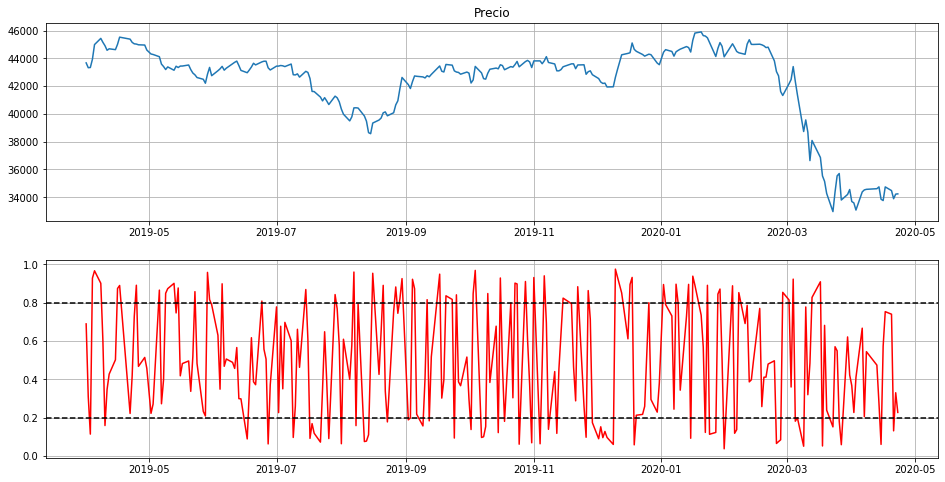

In [89]:
fig = plt.figure(figsize = (16,8))
ax1 = plt.subplot(211)
plt.plot(df.Close)
plt.grid(True)
plt.title('Precio')
ax2 = plt.subplot(212, sharex=ax1)
plt.plot(df.SOk, color = 'r')
plt.axhline(y=0.8, color = 'k', linestyle = '--')
plt.axhline(y=0.2, color = 'k', linestyle = '--')
plt.grid(True)
plt.show()

In [90]:
def STO(df, nK, nD, nS=1):
    SOk = pd.Series((df['Close'] - df['Low'].rolling(nK).min())/(df['High'].rolling(nK).max() - df['Low'].rolling(nK).min()), name = 'SOk'+str(nK) )
    SOd = pd.Series(SOk.ewm(ignore_na = False, span = nD, min_periods = nD -1, adjust = True).mean(), name = 'SOd'+str(nD))
    SOk = SOk.ewm(ignore_na = False, span = nS, min_periods = nS - 1 , adjust = True).mean()
    SOd = SOd.ewm(ignore_na = False, span = nS, min_periods = nS - 1 , adjust = True).mean()
    df = df.join(SOk)
    df = df.join(SOd)
    return df

In [91]:
df2 = STO(ipc, 14, 3)
df2.tail()

,High,Low,Open,Close,Volume,Adj Close,SOk14,SOd3
Date,,,,,,,,
2020-04-17,34923.761719,34190.019531,34190.019531,34743.101562,162231800,34743.101562,0.822160,0.590849
2020-04-20,34594.968750,34140.750000,34567.179688,34477.058594,153774600,34477.058594,0.724506,0.657677
2020-04-21,34321.199219,33826.921875,34281.140625,33892.281250,122731100,33892.281250,0.509858,0.583767
2020-04-22,34463.128906,34105.480469,34183.390625,34223.851562,200294400,34223.851562,0.631564,0.607666
2020-04-23,34494.980469,34165.320312,34308.410156,34240.601562,197079500,34240.601562,0.637712,0.622689


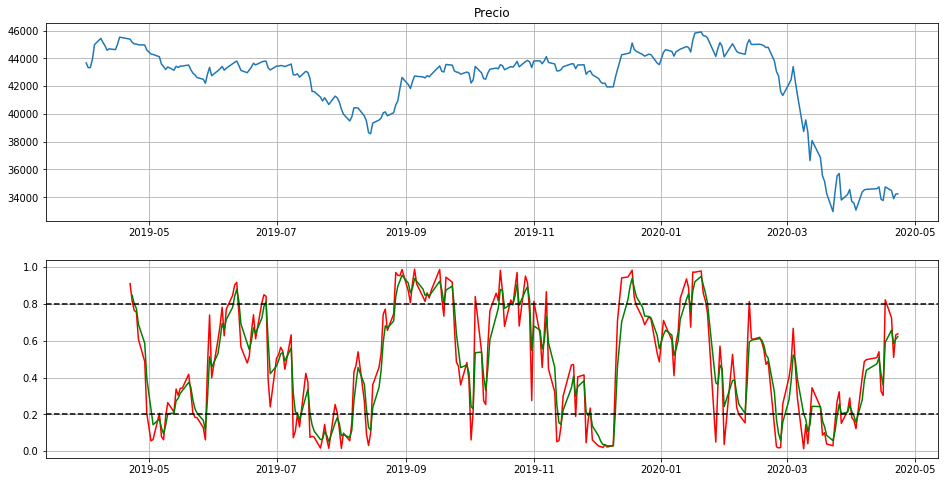

In [92]:
fig = plt.figure(figsize = (16,8))
ax1 = plt.subplot(211)
plt.plot(df2.Close)
plt.grid(True)
plt.title('Precio')
ax2 = plt.subplot(212, sharex=ax1)
plt.plot(df2.SOk14, color = 'r')
plt.plot(df2.SOd3, color = 'g')
plt.axhline(y=0.8, color = 'k', linestyle = '--')
plt.axhline(y=0.2, color = 'k', linestyle = '--')
plt.grid(True)
plt.show()

In [93]:
def STOs(df, nK, nD, nS=1):
    SOk = pd.Series((df['Close'] - df['Low'].rolling(nK).min())/(df['High'].rolling(nK).max() - df['Low'].rolling(nK).min()), name = 'SOk'+str(nK) )
    SOd = pd.Series(SOk.rolling(window = nD, center = False).mean(), name = 'SOd'+str(nD))
    SOk = SOk.rolling(window = nS, center = False).mean()
    SOd = SOd.rolling(window = nS, center = False).mean()
    df = df.join(SOk)
    df = df.join(SOd)
    return df

In [94]:
df3 = STOs(ipc, 10, 2)
df3.tail()

,High,Low,Open,Close,Volume,Adj Close,SOk10,SOd2
Date,,,,,,,,
2020-04-17,34923.761719,34190.019531,34190.019531,34743.101562,162231800,34743.101562,0.822160,0.641685
2020-04-20,34594.968750,34140.750000,34567.179688,34477.058594,153774600,34477.058594,0.724506,0.773333
2020-04-21,34321.199219,33826.921875,34281.140625,33892.281250,122731100,33892.281250,0.306024,0.515265
2020-04-22,34463.128906,34105.480469,34183.390625,34223.851562,200294400,34223.851562,0.478344,0.392184
2020-04-23,34494.980469,34165.320312,34308.410156,34240.601562,197079500,34240.601562,0.487049,0.482696


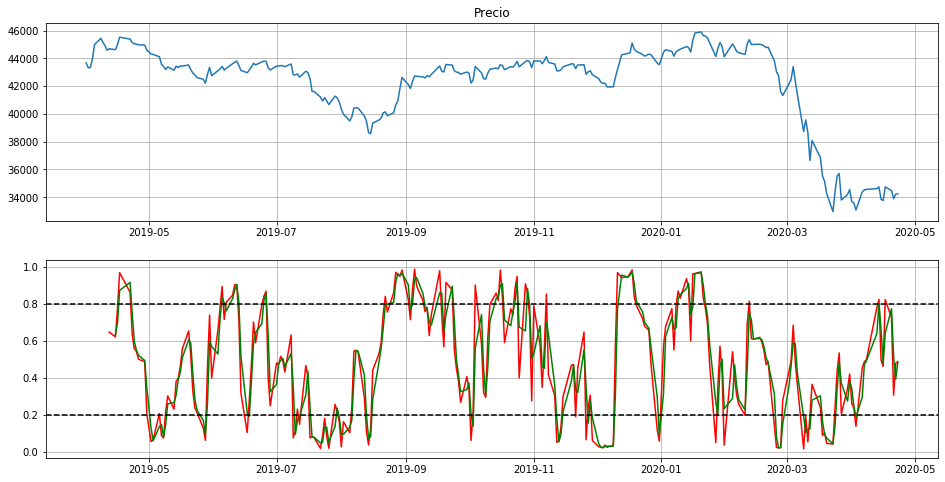

In [95]:
fig = plt.figure(figsize = (16,8))
ax1 = plt.subplot(211)
plt.plot(df3.Close)
plt.grid(True)
plt.title('Precio')
ax2 = plt.subplot(212, sharex=ax1)
plt.plot(df3.SOk10, color = 'r')
plt.plot(df3.SOd2, color = 'g')
plt.axhline(y=0.8, color = 'k', linestyle = '--')
plt.axhline(y=0.2, color = 'k', linestyle = '--')
plt.grid(True)
plt.show()